# COVID 19 SPIKE - ANALYSIS: CASE OF ALLEGHENY COUNTY

As We currently witness a surge in the number of covid-19 cases in pretty much all countries accross the globe,I believe that it will be important to see how the US is doing! The goal of this project focuses on impact of spike at both macro/micro levels in the US. Therefore through the differents datasets will try to answer the following:

1.) What is the Current Status of the Surge: How many confirmed cases, new cases, an probable Cases are we having today ? 


2.) Categorical Analysis:

    2.1- Which Age Group is Mostly affected By the Surge?
    
    2.2- What is the Sex and the Ethinicity of the Poeple affected by the Spkike of the Virus?
    
3.) Advanced Analysis

       3.1- Covid Viral Opportunities
       
       3.2- Covid-19 Hot Spots
    



In [27]:
import requests, json
import pandas as pd
import requests, json
from pandas import Series, DataFrame
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns
# in order to have Plots appear in the iPython Notebook
%matplotlib inline

In [5]:
# api_endpoint = 'https://data.cdc.gov/resource/vbim-akqf.json'
# resp_json = requests.get('https://data.cdc.gov/resource/vbim-akqf.json')
# print(resp_json.status_code)

In [6]:
# print(resp_json.text)

In [7]:
# states_datacovid = json.loads(resp_json.text)
# df_states_datacovid = DataFrame(states_datacovid)

In [8]:
# df_states_datacovid

In [9]:
# df_states_datacovid.shape

In [8]:
# # df_states_datacovid.tail()
# 'https://data.cdc.gov/resource/9bhg-hcku.json'

In [30]:
'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

csv_url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

election_csv = requests.get('http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv')
print(election_csv.status_code)

200


In [25]:
print(election_csv.text)

Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000,Likely Voters,Live Phone,47.0,47.0,6.0,,https://elections.huffingtonpost.com/pollster/polls/politico-gwu-battleground-16674,http://www.politico.com/news/stories/1112/83380.html,Nonpartisan,None,,1
YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740,Likely Voters,Internet,49.0,47.0,3.0,,https://elections.huffingtonpost.com/pollster/polls/yougov-economist-16733,http://cdn.yougov.com/cumulus_uploads/document/6pkdh10fns/econToplines.pdf,Nonpartisan,None,,1
Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872,Likely Voters,Automated Phone,48.0,48.0,4.0,,https://elections.huffingtonpost.com/pollster/polls/gravis-marketing-16681,http://www.gravispolls.com/2012/11/gravis-marketing-national-poll-shows.html,

In [56]:
# new_election_data = (election_csv.text)
# new_election_data

election_data = pd.read_csv(csv_url)
election_data

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1


In [57]:
election_data.shape

(586, 17)

In [58]:
election_data.dtypes

Pollster                   object
Start Date                 object
End Date                   object
Entry Date/Time (ET)       object
Number of Observations    float64
Population                 object
Mode                       object
Obama                     float64
Romney                    float64
Undecided                 float64
Other                     float64
Pollster URL               object
Source URL                 object
Partisan                   object
Affiliation                object
Question Text             float64
Question Iteration          int64
dtype: object

In [1]:
# # https://data.cdc.gov/resource/vbim-akqf.json
# # https://data.cdc.gov/resource/muzy-jte6.json
# api_endpoint = 'https://data.cdc.gov/resource/9bhg-hcku.json'
# resp_json = requests.get('https://data.cdc.gov/resource/9bhg-hcku.json')
# print(resp_json.status_code)
# print(resp_json.text)
# states_datacovid = json.loads(resp_json.text)
# df_states_datacovid = DataFrame(states_datacovid)
# print(df_states_datacovid)


In [41]:
sns.set_style('whitegrid')

In [51]:


aff_population_dat = pd.DataFrame(new_election_data, columns=['Affiliation','Population' ])
aff_population_dat

,Affiliation,Population
0,None,Likely Voters
1,None,Likely Voters
2,None,Likely Voters
3,None,Likely Voters
4,None,Likely Voters
...,...,...
581,Dem,Registered Voters
582,Dem,Registered Voters
583,Dem,Registered Voters
584,Dem,Registered Voters


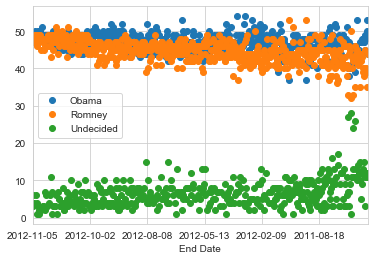

In [75]:
# Quick Analysis of voter Sentiment for each candidate and the undecided voter Over time

# What are we noticing: the number of undecided voters narrows as the election approches
# An Almost equal concentration of the number of voters between the two candidates as we get closer to the Election 

election_data.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')
 

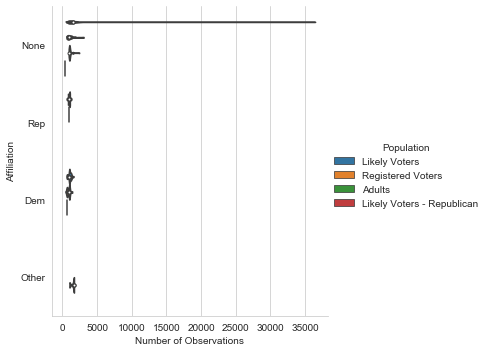

In [65]:
#  sns.factorplot( x=  )
sns.catplot(x="Number of Observations", y="Affiliation", hue="Population",
            kind="violin", bw=.30, cut=0,
            data=election_data)

In [68]:
#

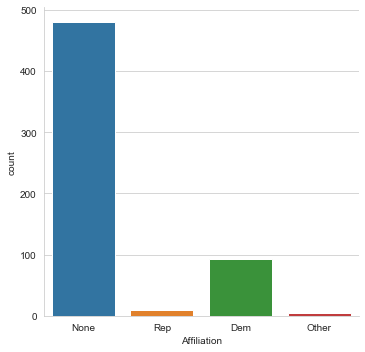

In [73]:
sns.factorplot(x ='Affiliation', kind = 'count', data = election_data) 

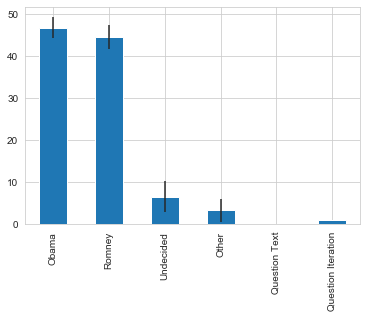

In [60]:
avg = pd.DataFrame(election_data.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(election_data.std())
std.drop('Number of Observations',axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

In [55]:
# viz_1 = sns.barplot('Affiliation', data=aff_population_dat, hue= 'Population')

In [40]:

# df_states_datacovid = DataFrame(states_datacovid)
# print(df_states_datacovid)
# df_states_datacovid

In [16]:
df_states_datacovid.columns


Index(['data_as_of', 'start_week', 'end_week', 'state', 'sex', 'age_group_new',
       'covid_19_deaths', 'total_deaths', 'pneumonia_deaths',
       'pneumonia_and_covid_19_deaths', 'influenza_deaths',
       'pneumonia_influenza_or_covid', 'footnote'],
      dtype='object')

In [33]:
new_df = pd.DataFrame(df_states_datacovid, columns=['state', 'sex', 'age_group_new','covid_19_deaths', 'total_deaths', ])

In [34]:
new_df

,state,sex,age_group_new,covid_19_deaths,total_deaths
0,United States,All Sexes,All Ages,249570,2635214
1,United States,All Sexes,Under 1 year,29,14843
2,United States,All Sexes,0-17 years,127,26333
3,United States,All Sexes,1-4 years,16,2768
4,United States,All Sexes,5-14 years,44,4453
...,...,...,...,...,...
995,Maine,All Sexes,All Ages,219,12695
996,Maine,Male,All Ages,110,6643
997,Maine,Male,Under 1 year,0,29
998,Maine,Male,0-17 years,0,56


In [35]:
depts = new_df['total_deaths']
depts.value_counts()

0        270
10         7
17         5
47         4
27         4
        ... 
12425      1
403        1
540        1
46         1
922        1
Name: total_deaths, Length: 588, dtype: int64

In [37]:
dfs = df_states_datacovid['total_deaths']
dfs.value_counts()

0        270
10         7
17         5
47         4
27         4
        ... 
12425      1
403        1
540        1
46         1
922        1
Name: total_deaths, Length: 588, dtype: int64

In [27]:
# df_states_datacovid.plot(kind='bar',figsize=(16,8),cmap='seismic')

In [51]:
# # Building Request URL for sending to CDC API
# import requests
# api_endpoint = 'https://data.cdc.gov/resource/'

# def building_CDC_URL():
#     rout_tojsonfile = 'vbim-akqf.json'
#     url_four = api_endpoint + rout_tojsonfile
#     return url_four 
    

In [46]:
# def make_APIreq(url_four):
#     resp = requests.get(url_four)
#     print(resp.status_code)
#     if(int(resp.status_code) == 200):
#         payload = json.loads(resp.text)
#         return payload
#     else:
#         return{}

In [52]:
# result = make_APIreq(building_CDC_URL()) 
# print(result)

In [48]:
test_df = DataFrame(result)

NameError: name 'result' is not defined

In [47]:
test_df

NameError: name 'test_df' is not defined

In [55]:
test_df.tail()

,cdc_report_dt,pos_spec_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,onset_dt
995,2020-11-18T00:00:00.000,2020-11-10T00:00:00.000,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,Yes,2020-11-08T00:00:00.000
996,2020-11-16T00:00:00.000,2020-11-10T00:00:00.000,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,NaN
997,2020-11-14T00:00:00.000,2020-11-10T00:00:00.000,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,Missing,Unknown,NaN
998,2020-11-13T00:00:00.000,2020-11-10T00:00:00.000,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,No,No,Missing,2020-11-08T00:00:00.000
999,2020-11-16T00:00:00.000,2020-11-10T00:00:00.000,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,No,2020-11-10T00:00:00.000


In [57]:
test_df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'current_status', 'sex', 'age_group',
       'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn',
       'medcond_yn', 'onset_dt'],
      dtype='object')

In [58]:
df_sliced = pd.DataFrame(test_df, columns=['current_status', 'sex', 'age_group', ])

In [59]:
df_sliced

,current_status,sex,age_group
0,Laboratory-confirmed case,Male,10 - 19 Years
1,Laboratory-confirmed case,Male,10 - 19 Years
2,Laboratory-confirmed case,Male,10 - 19 Years
3,Laboratory-confirmed case,Male,10 - 19 Years
4,Laboratory-confirmed case,Male,10 - 19 Years
...,...,...,...
995,Laboratory-confirmed case,Female,10 - 19 Years
996,Laboratory-confirmed case,Female,10 - 19 Years
997,Laboratory-confirmed case,Female,10 - 19 Years
998,Laboratory-confirmed case,Female,10 - 19 Years


In [61]:
count_agegroup = df_sliced['age_group'].value_counts()
count_agegroup

10 - 19 Years    1000
Name: age_group, dtype: int64

In [ ]:
sns.plot

In [63]:
# Overview of the Overall Statewide Dataset
# https://data.cdc.gov/resource/9mfq-cb36.json(API ENDPOINT FOR COUNTRY DATASET)
# https://data.cdc.gov/resource/vbim-akqf.json
api_endpoint_two= 'https://data.cdc.gov/resource/'

In [65]:
api_endpoint_two= 'https://data.cdc.gov/resource/'

def building_STATEDATA_URL():
    path2_tojsonfile = 'vbim-akqf.json'
    statewide_URL = api_endpoint_two + path2_tojsonfile
    return statewide_URL 

In [64]:
def make_APIreq(statewide_URL):
    resp = requests.get(statewide_URL)
    print(resp.status_code)
    if(int(resp.status_code) == 200):
        payload_2 = json.loads(resp.text)
        return payload_2
    else:
        return{}

In [66]:
result_two = make_APIreq(building_STATEDATA_URL()) 
print(result_two)

200
[{'submission_date': '2020-01-22T00:00:00.000', 'state': 'CO', 'tot_cases': '0', 'new_case': '0', 'tot_death': '0', 'new_death': '0', 'created_at': '2020-03-26T16:22:39.452', 'consent_cases': 'Agree', 'consent_deaths': 'Agree'}, {'submission_date': '2020-01-23T00:00:00.000', 'state': 'CO', 'tot_cases': '0', 'new_case': '0.0', 'tot_death': '0', 'new_death': '0.0', 'created_at': '2020-03-26T16:22:39.452', 'consent_cases': 'Agree', 'consent_deaths': 'Agree'}, {'submission_date': '2020-01-24T00:00:00.000', 'state': 'CO', 'tot_cases': '0', 'new_case': '0.0', 'tot_death': '0', 'new_death': '0.0', 'created_at': '2020-03-26T16:22:39.452', 'consent_cases': 'Agree', 'consent_deaths': 'Agree'}, {'submission_date': '2020-01-25T00:00:00.000', 'state': 'CO', 'tot_cases': '0', 'new_case': '0.0', 'tot_death': '0', 'new_death': '0.0', 'created_at': '2020-03-26T16:22:39.452', 'consent_cases': 'Agree', 'consent_deaths': 'Agree'}, {'submission_date': '2020-01-26T00:00:00.000', 'state': 'CO', 'tot_case

In [67]:
statewide_df = DataFrame(result_two)

In [68]:
statewide_df

,submission_date,state,tot_cases,new_case,tot_death,new_death,created_at,consent_cases,consent_deaths,conf_cases,prob_cases,pnew_case,conf_death,prob_death,pnew_death
0,2020-01-22T00:00:00.000,CO,0,0,0,0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23T00:00:00.000,CO,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24T00:00:00.000,CO,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25T00:00:00.000,CO,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26T00:00:00.000,CO,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-02-23T00:00:00.000,SC,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
996,2020-02-24T00:00:00.000,SC,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
997,2020-02-25T00:00:00.000,SC,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
998,2020-02-26T00:00:00.000,SC,0,0.0,0,0.0,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN


200
{"id":10,"title":"2012 General Election: Romney vs. Obama","slug":"2012-general-election-romney-vs-obama","topic":"2012-president","state":"US","short_title":"Romney vs. Obama","election_date":"2012-11-06","poll_count":590,"last_updated":"2016-07-08T16:35:27.000Z","url":"https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama","estimates":[{"choice":"Obama","value":48.2,"lead_confidence":null,"first_name":"Barack","last_name":"Obama","party":"Dem","incumbent":true},{"choice":"Romney","value":46.7,"lead_confidence":null,"first_name":"Mitt","last_name":"Romney","party":"Rep","incumbent":false},{"choice":"Other","value":5.1,"lead_confidence":null,"first_name":"","last_name":"Other","party":null,"incumbent":false}],"estimates_by_date":[{"date":"2012-11-04","estimates":[{"choice":"Obama","value":48.2},{"choice":"Romney","value":46.7},{"choice":"Other","value":5.1}]},{"date":"2012-11-03","estimates":[{"choice":"Obama","value":48.2},{"choice":"Romney","value":4

In [46]:
# df_states_datacovid = DataFrame(states_datacovid)
# print(df_states_datacovid)